# Statystyka matematyczna - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Nazwa zespołu: 2.12
Członkowie: Adam Dracz , Maurycy Ebertowski 406499

---

# Zestaw zadań 3: Rozkłady zmiennych losowych wielowymiarowych

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Funkcje do wykorzystania

In [3]:
def vizualize_2d_discrete_distribution(pmf, cdf, mask=None):
    """
    Parameters
    -------
    pmf: pandas.DataFrame
        Tablica zawierająca nazwy kolumn z wariantami pierwszej zmiennej losowej i nadaną zbiorczą nazwą zmiennej (np. x),
        indeks z wariantami drugiej zmiennej losowej i nadaną zbiorczą nazwą zmiennej (np. y),
        a wartości w tablicy są prawdopodobieństwami poszczególnych wariantów zmiennej.
    cdf: pandas.DataFrame
        Tablica zawierająca nazwy kolumny w formacie pandas.IntervalIndex z przedziałami wartości pierwszej zmiennej losowej i nadaną zbiorczą nazwą zmiennej (np. x),
        indeks w formacie pandas.IntervalIndex z przedziałami wartości drugiej zmiennej losowej i nadaną zbiorczą nazwą zmiennej (np. y),
        a wartości w tablicy są wartościami dystrybuanty dla poszczególnych przedziałów.
    mask: numpy.ndarray
        Macierz logiczna 2D określająca, które z wariantów zmiennej losowej spełniają wizualizowaną nierówność, a które nie.
    """    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), facecolor='white')

    fig.suptitle("Rozkład prawdopodobieństwa i dystrybuanta dwuwymiarowej zmiennej losowej dyskretnej")

    if mask is None:
        sns.heatmap(data=pmf, vmin=0, vmax=np.max(pmf.values), cmap="Blues", annot=True, linewidths=2, linecolor='grey', ax=axes[0])
    else:
        sns.heatmap(data=pmf, vmin=0, vmax=np.max(pmf.values), cmap="Blues", annot=True, annot_kws={'color':'darkgreen'}, linewidths=2, linecolor='grey', mask=~mask, ax=axes[0])
        sns.heatmap(data=pmf, vmin=0, vmax=np.max(pmf.values), cmap="Blues", annot=True, annot_kws={'color':'red'}, linewidths=2, linecolor='grey', mask=mask, cbar=False, ax=axes[0])
    axes[0].set_title("Rozkład prawdopodobieństwa")
    axes[0].tick_params(labelrotation=0)

    sns.heatmap(data=cdf, vmin=0, vmax=1, cmap="Blues", annot=True, linewidths=2, linecolor='grey', ax=axes[1])
    axes[1].set_title("Dystrybuanta")
    axes[1].tick_params(labelrotation=45)


### Dane do zadań

Pliki r1p.pkl oraz r1f.pkl zawierają funkcję rozkładu prawdopodobieństwa oraz dystrybuantę przykładowej dwywymiarowej zmiennej losowej dyskretnej.

W celu wczytania danych do notatnika umieść pliki w tym samym folderze, w którym znajduje się notatnik.

In [4]:
r1p = pd.read_pickle("r1p.pkl")
r1p

x,1,2,3,4
y,,,,
0,0.060,0.100,0.160,0.080
5,0.018,0.030,0.048,0.024
10,0.027,0.045,0.070,0.028
15,0.045,0.075,0.120,0.070


In [5]:
r1f= pd.read_pickle("r1f.pkl")
r1f

x,"[-inf, 1.0)","[1.0, 2.0)","[2.0, 3.0)","[3.0, 4.0)","[4.0, inf)"
y,,,,,
"[-inf, 0.0)",0.0,0.000,0.000,0.000,0.00
"[0.0, 5.0)",0.0,0.060,0.160,0.320,0.40
"[5.0, 10.0)",0.0,0.078,0.208,0.416,0.52
"[10.0, 15.0)",0.0,0.105,0.280,0.558,0.69
"[15.0, inf)",0.0,0.150,0.400,0.798,1.00


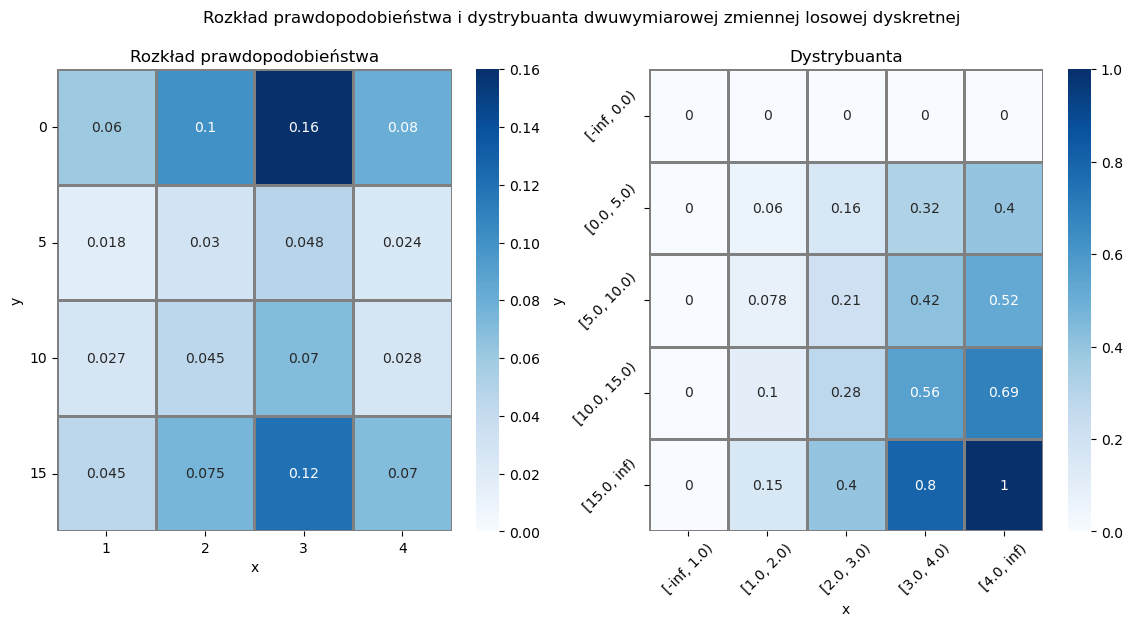

In [6]:
vizualize_2d_discrete_distribution(r1p, r1f)

### Zadanie 1: Przykładowy dwuwymiarowy dyskretny rozkład prawdopodobieństwa [17 pkt]

Bazując na wczytanym do notatnika przykładowym dwuwymiarowym rozkładzie prawdopodobieństwa oblicz jego rozkłady brzegowe, wybrane rozkłady warunkowe oraz podstawowe parametry rozkładu.

#### a) Rozkłady brzegowe

Przedstaw funkcje brzegowych rozkładów prawdopodobieństwa zmiennej losowej dwuwymiarowej X, Y w formie tablic `r1bx`  i `r1by` o następującej strukturze:

Tablica `r1bx`:
> Indeks:</br>
> x - warianty przyjmowane przez zmienną X.</br>

> Kolumny: </br>
> P(X=x) - prawdopodobieństwa rozkładu brzegowego zmiennej X.

Tablica `r1by`:
> Indeks:</br>
> y - warianty przyjmowane przez zmienną Y.</br>

> Kolumny: </br>
> P(Y=y) - prawdopodobieństwa rozkładu brzegowego zmiennej Y.

In [7]:
# Rozkład brzegowy X
# YOUR CODE HERE
indexes = r1p.columns.values
values = r1p.sum()
r1bx = pd.DataFrame({"P(X=x)": values}, index=indexes)
r1bx.index.name = "x"
r1bx

,P(X=x)
x,
1,0.150
2,0.250
3,0.398
4,0.202


In [8]:
# Komórka testowa
assert type(r1bx) == pd.DataFrame
assert r1bx.shape == (4, 1)
assert list(r1bx.columns) == ["P(X=x)"]
assert r1bx.index.name == 'x'
assert np.isclose(np.sum(r1bx.index.values), 10)
assert np.isclose(np.sum(r1bx["P(X=x)"]), 1)

In [9]:
# Rozkład brzegowy Y
# YOUR CODE HERE
indexes = r1p.index.values
values = r1p.sum(axis=1)
r1by = pd.DataFrame({"P(Y=y)": values}, index=indexes)
r1by.index.name = "y"
r1by

,P(Y=y)
y,
0,0.40
5,0.12
10,0.17
15,0.31


In [10]:
# Komórka testowa
assert type(r1by) == pd.DataFrame
assert r1by.shape == (4, 1)
assert list(r1by.columns) == ["P(Y=y)"]
assert r1by.index.name == 'y'
assert np.isclose(np.sum(r1by.index.values), 30)
assert np.isclose(np.sum(r1by["P(Y=y)"]), 1)

#### b) Przykładowe rozkłady warunkowe

Przedstaw funkcje przykładowych warunkowych rozkładów prawdopodobieństwa zmiennej losowej dwuwymiarowej X, Y w formie tablic `r1wx`  i `r1wy` o następującej strukturze:

Tablica `r1wx`:
> Indeks:</br>
> x - warianty przyjmowane przez zmienną X.</br>

> Kolumny: </br>
> P(X=x|Y=5) - prawdopodobieństwa rozkładu warunkowego P(X=x|Y=5) zmiennej X.

Tablica `r1wy`:
> Indeks:</br>
> y- warianty przyjmowane przez zmienną Y.</br>

> Kolumny: </br>
> P(Y=y|X=2) - prawdopodobieństwa rozkładu warunkowego P(Y=y|X=2) zmiennej Y.

In [11]:
# Rozkład warunkowy X
# YOUR CODE HERE
indexes = r1p.columns.values
sum_row = r1p.iloc[1, :].sum()
values = r1p.iloc[1, :] / sum_row
r1wx = pd.DataFrame({"P(X=x|Y=5)": values}, index=indexes)
r1wx.index.name = "x"
r1wx

,P(X=x|Y=5)
x,
1,0.15
2,0.25
3,0.40
4,0.20


In [12]:
# Rozkład warunkowy Y
indexes = r1p.index.values
sum_column = r1p.iloc[:, 1].sum()
values = r1p.iloc[:, 1] / sum_column
r1wy = pd.DataFrame({"P(Y=y|X=2)": values}, index=indexes)
r1wy.index.name = "y"
r1wy

,P(Y=y|X=2)
y,
0,0.40
5,0.12
10,0.18
15,0.30


In [13]:
# Komórka testowa
assert type(r1wy) == pd.DataFrame
assert r1wy.shape == (4, 1)
assert list(r1wy.columns) == ["P(Y=y|X=2)"]
assert r1wy.index.name == 'y'
assert np.isclose(np.sum(r1wy.index.values), 30)
assert np.isclose(np.sum(r1wy["P(Y=y|X=2)"]), 1)

#### c) Podstawowe parametry rozkładu

Oblicz i zapisz do zmiennych następujące parametry rozkładu zmiennej losowej dwuwymiarowej X, Y - wartość średnia (`r1_mean`), wariancja(`r1_var`), odchylenie standardowe (`r1_std`), kowariancję (`r1_cov`) oraz współczynnik korelacji (`r1_r`).

In [14]:
# Wartość oczekiwana
r1_mean = 0
for i in r1p.columns:
    for k in r1p.index:
        r1_mean += i * k * r1p[i].loc[k]
r1_mean

18.505

In [15]:
# Wariancja
r1_var = 0
mean_x = 0
mean_y = 0

for x in r1bx.itertuples(): #intertuples to wiersze data frame
    mean_x += x.Index * x[1]

for y in r1by.itertuples():
    mean_y += y.Index * y[1]

for x in r1p.columns:
    for y in r1p.index:
        r1_var += (x - mean_x) ** 2 * (y - mean_y) ** 2 * r1p[x].loc[y]

r1_var

38.96800412

In [16]:
# Odchylenie standardowe
# YOUR CODE HERE
r1_std = r1_var ** (1/2)
r1_std

6.242435752172384

In [17]:
# Kowariancja
# YOUR CODE HERE
r1_cov = 0

for x in r1p.columns:
    for y in r1p.index:
        r1_cov += (x - mean_x) * (y - mean_y) * r1p[x].loc[y]

r1_cov

0.07360000000000033

In [18]:
# Współczynnik korelacji
# YOUR CODE HERE
x_var = 0
y_var = 0

for x in r1bx.itertuples():
    x_var += (x.Index - mean_x) ** 2 * x[1]

for y in r1by.itertuples():
    y_var += (y.Index - mean_y) ** 2 * y[1]
x_std = x_var ** (0.5)
y_std = y_var ** (0.5)
r1_r = r1_cov / (x_std * y_std)

r1_r

0.011848900761810936

In [19]:
# Komórka testowa
assert np.isclose(r1_mean, 18.505)
assert np.isclose(r1_var, 38.96800412)
assert np.isclose(r1_std, 6.242435752172384)
assert np.isclose(r1_cov, 0.07360000000000022)
assert np.isclose(r1_r, 0.011848900761810917)

### Zadanie 2: Obliczanie i wizualizacja prawdopodobieństw [6 pkt]

Oblicz i przedstaw na wykresach następujące prawdopodobieństwa:
- P(X>2, 0<Y<=10)
- P(X<=2|X>3, Y>=5)

Wyniki zapisz kolejno do zmiennych `p1` i `p2`oraz przedstaw na wykresach korzystając z funkcji `vizualize_2d_discrete_distribution()`.

#### a) P(X>2, 0<Y<=10)

C:\Users\1\AppData\Local\Temp\ipykernel_9952\1423190455.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  mask[x][y] = True


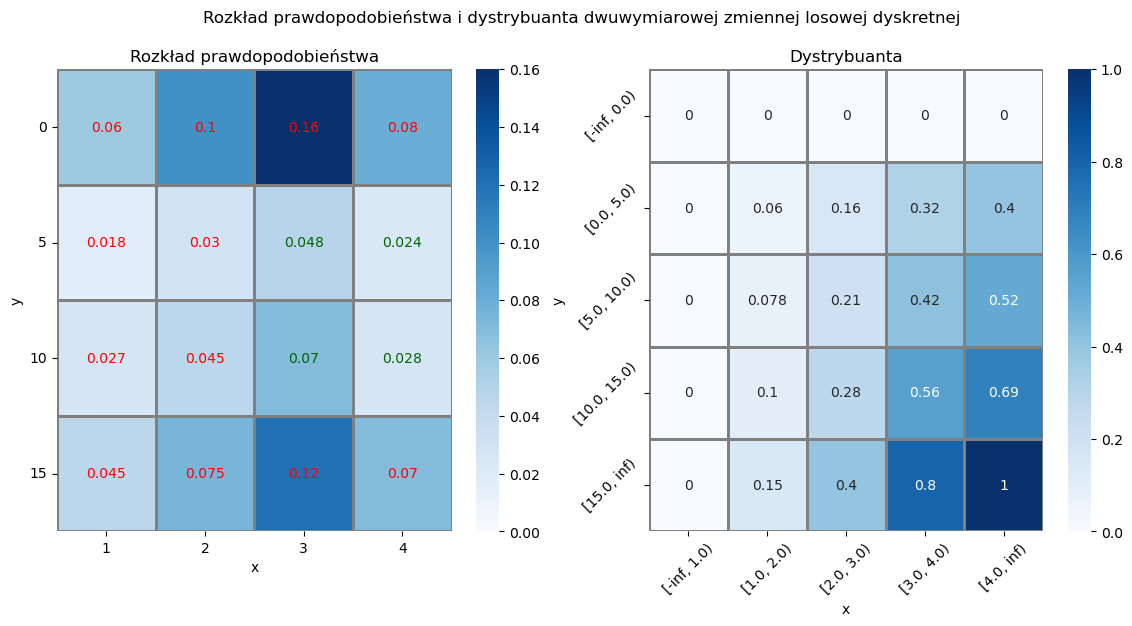

In [20]:
# YOUR CODE HERE
mask = pd.DataFrame(np.full((4, 4), False), columns=r1p.columns, index=r1p.index)#tworzy tabelę 4x4 wypełnioną False-ami
for x in (3, 4):
    for y in (5, 10):
        mask[x][y] = True
vizualize_2d_discrete_distribution(r1p, r1f, mask)
p1 = r1p[mask].sum().sum()

In [21]:
# Komórka testowa
assert np.isclose(p1, 0.17)

#### b) P(X<=2|X>3, Y>=5)

C:\Users\1\AppData\Local\Temp\ipykernel_9952\3249598891.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  mask[x][y] = True


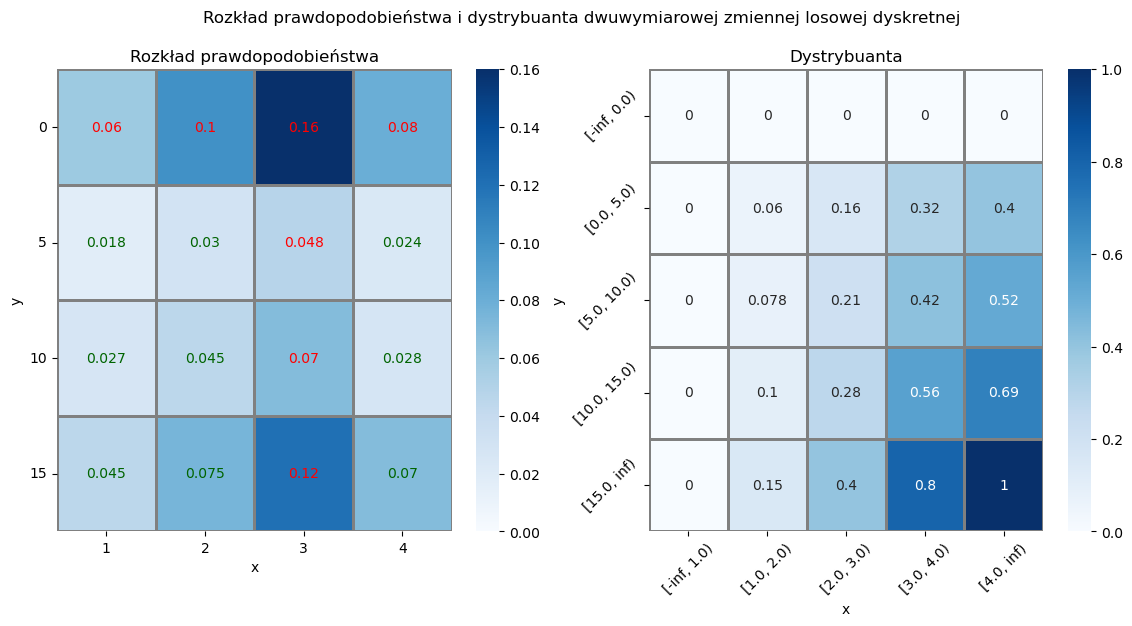

In [22]:
# YOUR CODE HERE
mask = pd.DataFrame(np.full((4, 4), False), columns=r1p.columns, index=r1p.index)
for x in (1, 2, 4):
    for y in (5, 10, 15):
        mask[x][y] = True
vizualize_2d_discrete_distribution(r1p, r1f, mask)
p2 = r1p[mask].sum().sum()

In [23]:
# Komórka testowa
assert np.isclose(p2, 0.362)

### Zadanie 3: Niezależność zmiennych losowych [2 pkt]

Sprawdź, czy zmienne losowe X i Y są zmiennymi niezależnymi i zapisz wynik testu (True/False) do zmiennej `test`.

In [24]:
# YOUR CODE HERE
test = True
for x in r1p.columns:
    if not test:
        break
    for y in r1p.index:
        p_xy = r1p[x].loc[y]
        p = r1bx.loc[x].values[0] * r1by.loc[y].values[0]
        if p != p_xy:
            test = False
            break

In [25]:
# Komórka testowa
assert test==False